## Text Mining em documentos de Defesa Norte Americanos

##### Objetivo:
* Ver a quantidade de vezes que palavras relacionadas com cyber security aparecem aparecem conforme passam os anos.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
from bs4 import BeautifulSoup
import re
import string
import os
import nltk
from nltk.corpus import stopwords, wordnet
from nltk.tokenize import word_tokenize
from nltk.util import ngrams
from nltk.tag import pos_tag
from nltk.stem.wordnet import WordNetLemmatizer
#from collections import Counter



%matplotlib inline

In [2]:
import utilidade as u

In [3]:
df = u.ler_todos_arquivos()

                                                   text
2006        Annual Threat Assessment of the Director...
2007    \n Annual Threat Assessment \nof the \nDirec...
2008       Annual Threat Assessment of the   Intelli...
2009       Annual Threat Assessment of the   Intelli...
2010      Annual Threat Assessment of the   US Intel...


In [4]:
nltk.download('stopwords')
stop = stopwords.words('english')

#Adicionando algumas palavras que se percebeu ser comum nos arquivos e que não somam muito no objetivo
stop.append('us')
stop.append('united')
stop.append('states')
stop.append('also')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\galag\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [5]:
alphanumeric = lambda x: re.sub(r"""\w*\d\w*""", ' ', x)
punc_lower = lambda x: re.sub('[%s]' % re.escape(string.punctuation), ' ', x.lower())
remove_br = lambda x: re.sub(r""" br """, ' ', x.lower())
remove_n = lambda x: re.sub(r""" [\r\n]+ """, ' ', x.lower())
line = lambda x: x.strip()
linen =  lambda x: re.sub("\n","",x)


df['text_b'] = df.text.map(alphanumeric).map(punc_lower).map(remove_br).map(remove_n).map(line).map(linen)
df['text_b'] = df['text_b'].apply((lambda x: re.sub('[^a-zA-z0-9\s]','',x)))

In [6]:
most_commom_uni = u.get_top_text_ngrams(df.text_b, 1, stopwords=stop)

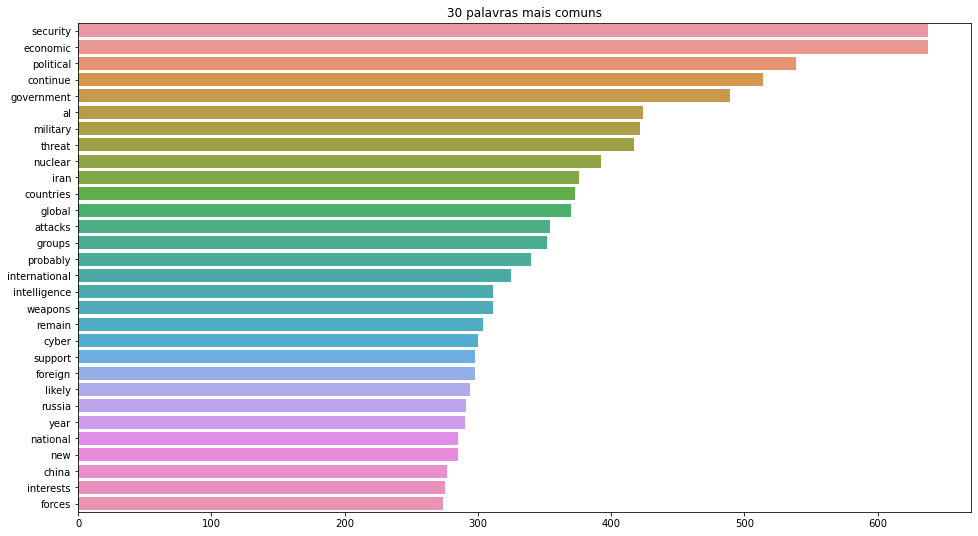

In [7]:
u.plota_frequencia_dict(most_commom_uni)

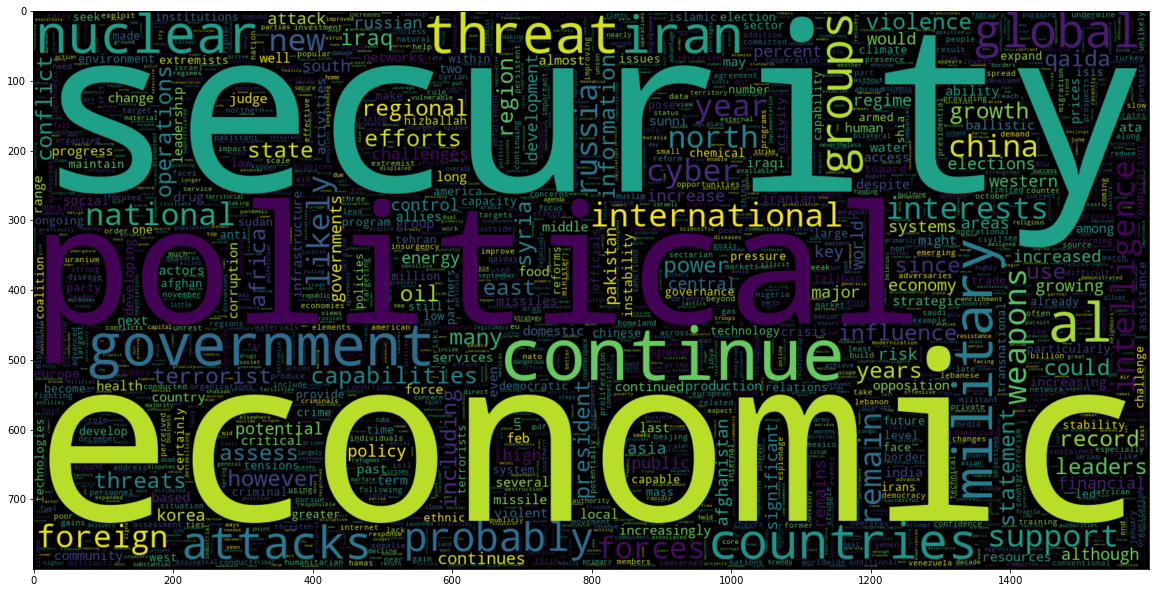

In [8]:
u.plota_wordcloud(most_commom_uni, stop)

In [9]:
most_commom_bi = u.get_top_text_ngrams(df.text_b, 2, stop)

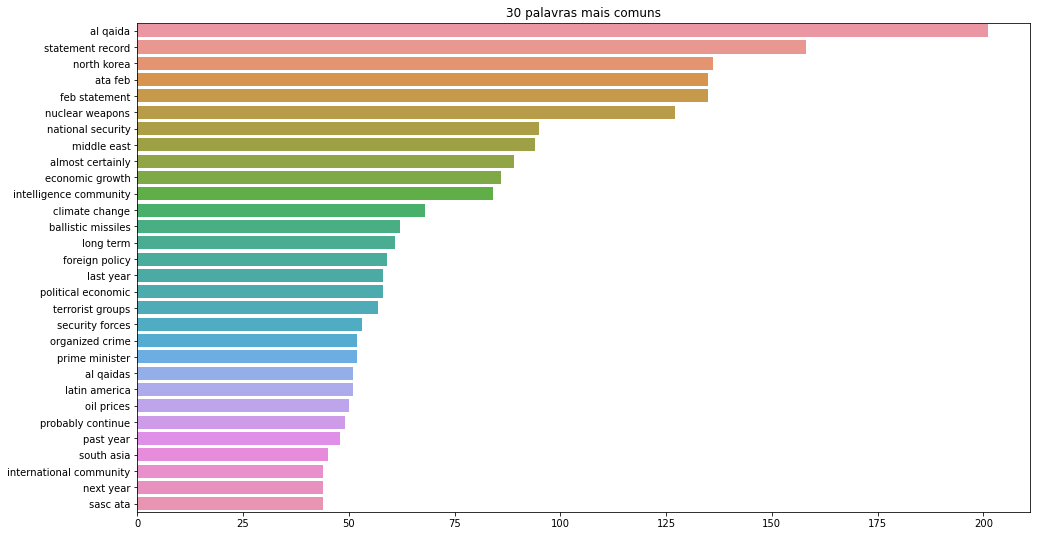

In [10]:
u.plota_frequencia_dict(most_commom_bi)

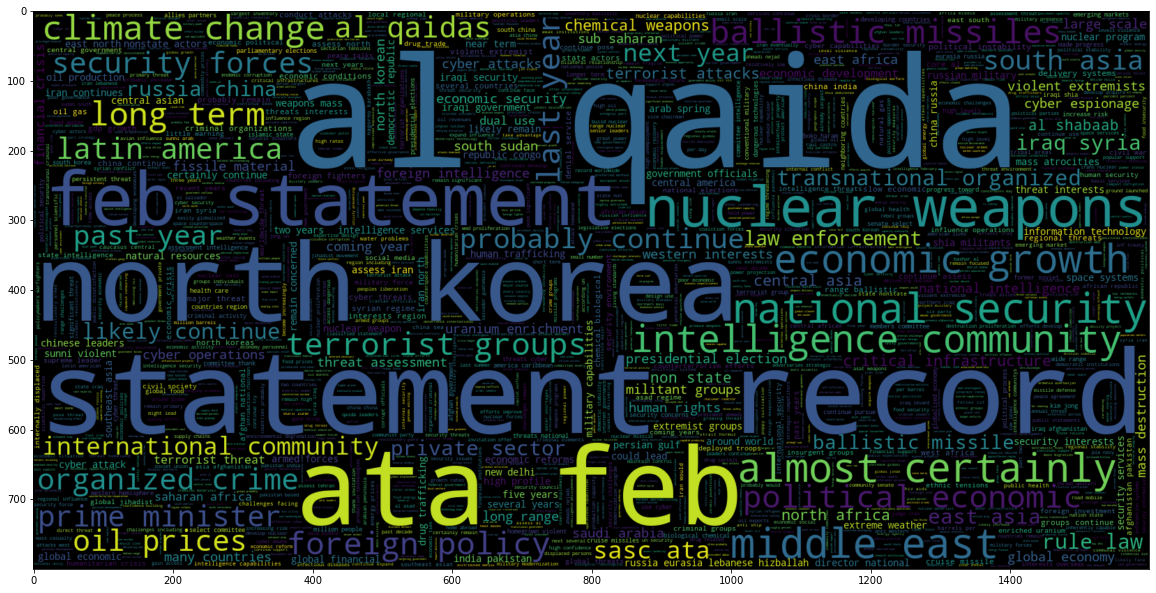

In [11]:
u.plota_wordcloud(most_commom_bi, stop)

In [12]:
nltk.download('all')

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to
[nltk_data]    |     C:\Users\galag\AppData\Roaming\nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to
[nltk_data]    |     C:\Users\galag\AppData\Roaming\nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package biocreative_ppi to
[nltk_data]    |     C:\Users\galag\AppData\Roaming\nltk_data...
[nltk_data]    |   Package biocreative_ppi is already up-to-date!
[nltk_data]    | Downloading package brown to
[nltk_data]    |     C:\Users\galag\AppData\Roaming\nltk_data...
[nltk_data]    |   Package brown is already up-to-date!
[nltk_data]    | Downloading package brown_tei to
[nltk_data]    |     C:\Users\galag\AppData\Roaming\nltk_data...
[nltk_data]    |   Package brown_tei is already up-to-date!
[nltk_data]    | Downloading package cess_cat to
[nltk_data]    |     C:\Users\g

True

In [13]:
#Para fazer tokenização

stop_lambda = lambda x: [y for y in x if y not in stop]
pos_lambda = lambda x: nltk.pos_tag(x)

df['token'] = df.text_b.map(word_tokenize)
df['tokens_stop'] = df.token.apply(stop_lambda)
df['tokens_pos'] = (df.tokens_stop.apply(pos_lambda))
# Convert the naming scheme to one that is recognized by WordNet
def get_wordnet_pos(treebank_tag):
    if treebank_tag.startswith('J'):
        return wordnet.ADJ
    elif treebank_tag.startswith('V'):
        return wordnet.VERB
    elif treebank_tag.startswith('N'):
        return wordnet.NOUN
    elif treebank_tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN

lemmatizer = WordNetLemmatizer()
lemmatizer_fun = lambda x: lemmatizer.lemmatize(*x)
df['tokens_lemma'] = df.tokens_pos\
                        .apply(lambda x: [(y[0], get_wordnet_pos(y[1])) for y in x])\
                        .apply(lambda x: [lemmatizer_fun(y) for y in x])

In [14]:
df.head()

text  \
2006        Annual Threat Assessment of the Director...   
2007    \n Annual Threat Assessment \nof the \nDirec...   
2008       Annual Threat Assessment of the   Intelli...   
2009       Annual Threat Assessment of the   Intelli...   
2010      Annual Threat Assessment of the   US Intel...   

                                                 text_b  \
2006  annual threat assessment of the director of na...   
2007  annual threat assessment of the director of na...   
2008  annual threat assessment of the   intelligence...   
2009  annual threat assessment of the   intelligence...   
2010  annual threat assessment of the   us intellige...   

                                                  token  \
2006  [annual, threat, assessment, of, the, director...   
2007  [annual, threat, assessment, of, the, director...   
2008  [annual, threat, assessment, of, the, intellig...   
2009  [annual, threat, assessment, of, the, intellig...   
2010  [annual, threat, assessment, of, the, us, inte...   

                                            tokens_stop  \
2006  [annual, threat, assessment, director, nationa...   
2007  [annual, threat, assessment, director, nationa...   
2008  [annual, threat, assessment, intelligence, com...   
2009  [annual, threat, assessment, intelligence, com...   
2010  [annual, threat, assessment, intelligence, com...   

                                             tokens_pos  \
2006  [(annual, JJ), (threat, NN), (assessment, JJ),...   
2007  [(annual, JJ), (threat, NN), (assessment, JJ),...   
2008  [(annual, JJ), (threat, NN), (assessment, JJ),...   
2009  [(annual, JJ), (threat, NN), (assessment, JJ),...   
2010  [(annual, JJ), (threat, NN), (assessment, JJ),...   

                                           tokens_lemma  
2006  [annual, threat, assessment, director, nationa...  
2007  [annual, threat, assessment, director, nationa...  
2008  [annual, threat, assessment, intelligence, com...  
2009  [annual, threat, assessment, intelligence, com...  
2010  [annual, threat, assessment, intelligence, com...

In [15]:
di = {}

for x in df.index:
    g = []
    for gram in ngrams(df['tokens_lemma'][x],2): 
        g.append(' '.join(gram))
    di[x] = g
df['bi_gram'] = di.values()


di = {}

for x in df.index:
    g = []
    for gram in ngrams(df['tokens_lemma'][x],3): 
        g.append(' '.join(gram))
    di[x] = g
df['tri_gram'] = di.values()

In [35]:
df.drop('2011',inplace=True)

[(38, 'political'), (31, 'threat'), (31, 'intelligence'), (31, 'government'), (31, 'al'), (30, 'economic'), (29, 'group'), (29, 'attack'), (27, 'iran'), (26, 'iraq'), (25, 'weapon'), (25, 'jihadist'), (25, 'country'), (25, 'continue'), (24, 'global'), (21, 'security'), (20, 'world'), (20, 'terrorist'), (20, 'new'), (20, 'interest')]
              quantidade
political             38
threat                31
intelligence          31
government            31
al                    31
---------
political       0.007652
threat          0.006242
intelligence    0.006242
government      0.006242
al              0.006242
Name: quantidade, dtype: float64


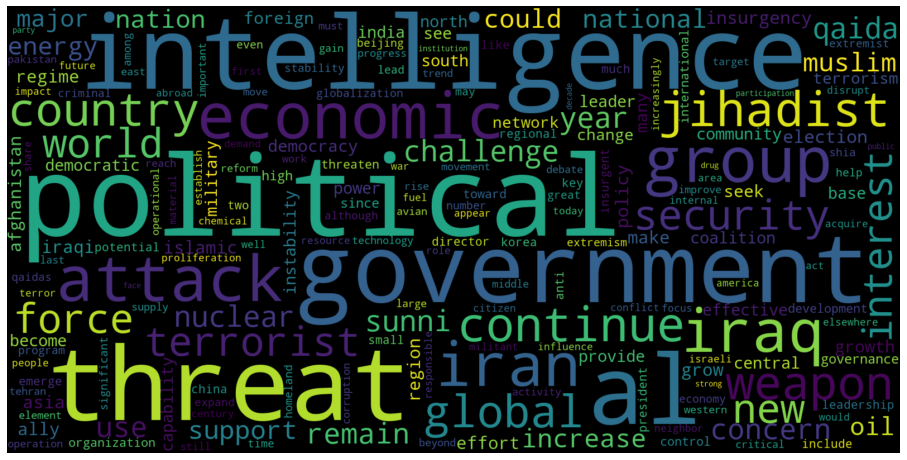

[(29, 'continue'), (28, 'region'), (25, 'government'), (24, 'country'), (23, 'iran'), (22, 'year'), (22, 'security'), (22, 'iraq'), (20, 'political'), (20, 'al'), (19, 'national'), (18, 'terrorist'), (17, 'threat'), (17, 'remain'), (17, 'power'), (17, 'intelligence'), (15, 'nuclear'), (15, 'energy'), (15, 'concern'), (15, 'challenge')]
            quantidade
continue            29
region              28
government          25
country             24
iran                23
---------
continue      0.007740
region        0.007473
government    0.006672
country       0.006405
iran          0.006138
Name: quantidade, dtype: float64


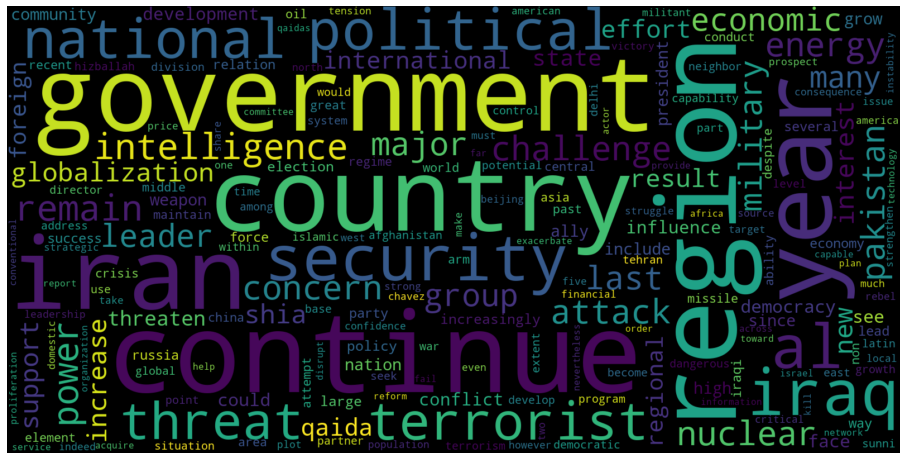

[(82, 'continue'), (74, 'security'), (64, 'al'), (63, 'iran'), (61, 'government'), (60, 'nuclear'), (55, 'political'), (54, 'year'), (53, 'weapon'), (53, 'statement'), (50, 'record'), (50, 'force'), (49, 'threat'), (49, 'group'), (45, 'remain'), (44, 'sasc'), (44, 'feb'), (44, 'ata'), (43, 'qaida'), (40, 'attack')]
            quantidade
continue            82
security            74
al                  64
iran                63
government          61
---------
continue      0.008734
security      0.007882
al            0.006816
iran          0.006710
government    0.006497
Name: quantidade, dtype: float64


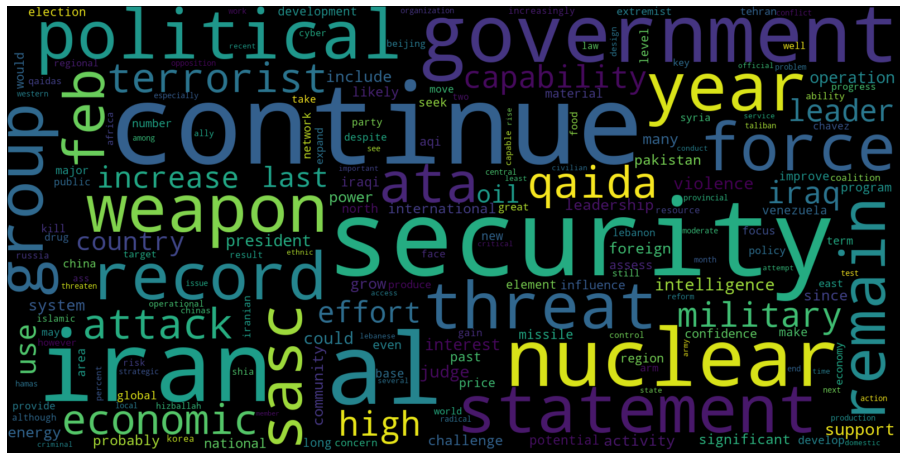

[(99, 'economic'), (84, 'government'), (84, 'continue'), (78, 'security'), (77, 'group'), (76, 'al'), (74, 'country'), (73, 'attack'), (71, 'year'), (69, 'political'), (69, 'iran'), (64, 'increase'), (63, 'nuclear'), (59, 'military'), (57, 'weapon'), (56, 'threat'), (56, 'support'), (56, 'leader'), (53, 'region'), (53, 'global')]
            quantidade
economic            99
government          84
continue            84
security            78
group               77
---------
economic      0.007171
government    0.006085
continue      0.006085
security      0.005650
group         0.005578
Name: quantidade, dtype: float64


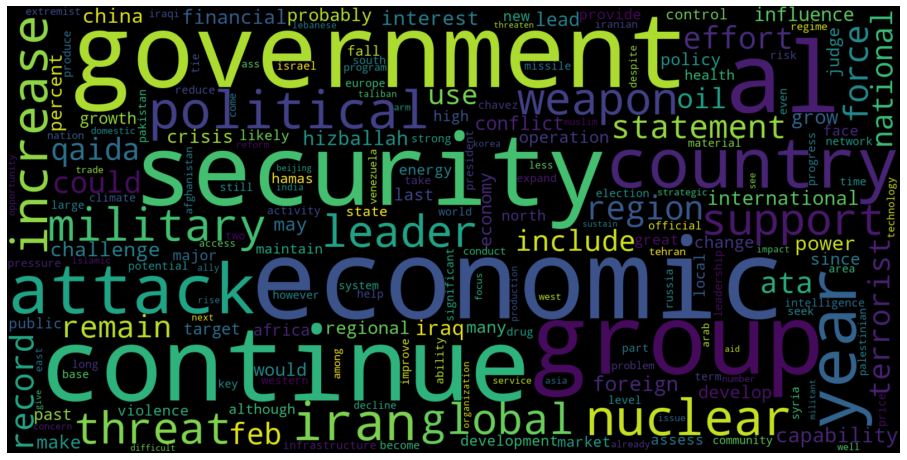

[(105, 'continue'), (93, 'government'), (93, 'economic'), (83, 'al'), (71, 'year'), (70, 'country'), (69, 'remain'), (67, 'threat'), (66, 'security'), (65, 'international'), (64, 'political'), (61, 'support'), (60, 'group'), (59, 'qaida'), (59, 'effort'), (57, 'statement'), (53, 'pakistan'), (53, 'increase'), (51, 'record'), (50, 'attack')]
            quantidade
continue           105
economic            93
government          93
al                  83
year                71
---------
continue      0.007950
economic      0.007041
government    0.007041
al            0.006284
year          0.005376
Name: quantidade, dtype: float64


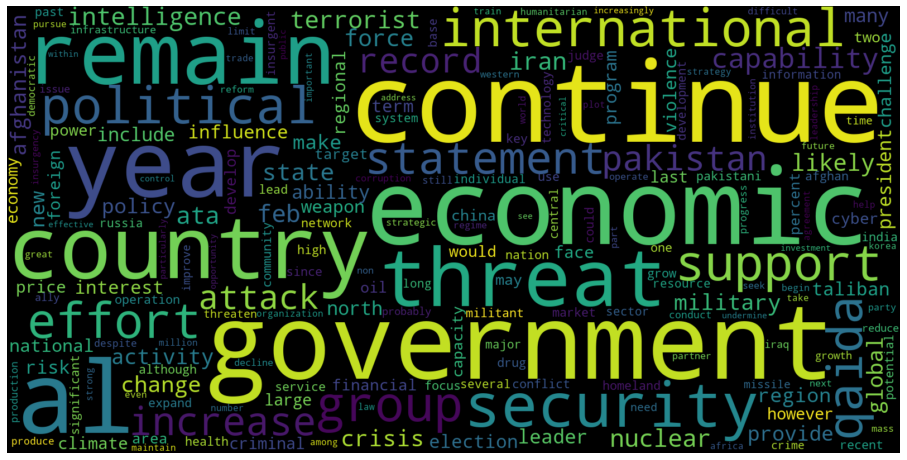

[(50, 'security'), (50, 'al'), (48, 'political'), (48, 'government'), (42, 'year'), (39, 'economic'), (38, 'force'), (37, 'threat'), (37, 'attack'), (32, 'nuclear'), (32, 'increase'), (32, 'global'), (31, 'remain'), (31, 'challenge'), (30, 'group'), (26, 'water'), (26, 'military'), (26, 'country'), (25, 'leader'), (25, 'continue')]
            quantidade
security            50
al                  50
political           48
government          48
year                42
---------
security      0.006800
al            0.006800
political     0.006528
government    0.006528
year          0.005712
Name: quantidade, dtype: float64


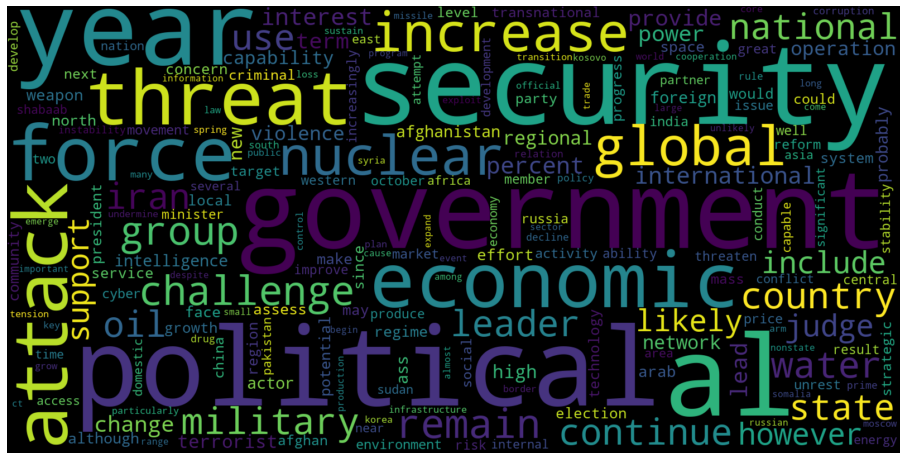

[(69, 'government'), (58, 'security'), (57, 'economic'), (53, 'political'), (51, 'year'), (51, 'military'), (50, 'threat'), (47, 'force'), (46, 'country'), (45, 'attack'), (40, 'iran'), (36, 'remain'), (36, 'foreign'), (35, 'group'), (35, 'continue'), (33, 'north'), (32, 'system'), (32, 'increase'), (31, 'regime'), (31, 'however')]
            quantidade
government          69
security            58
economic            57
political           53
year                51
---------
government    0.007292
security      0.006130
economic      0.006024
political     0.005601
year          0.005390
Name: quantidade, dtype: float64


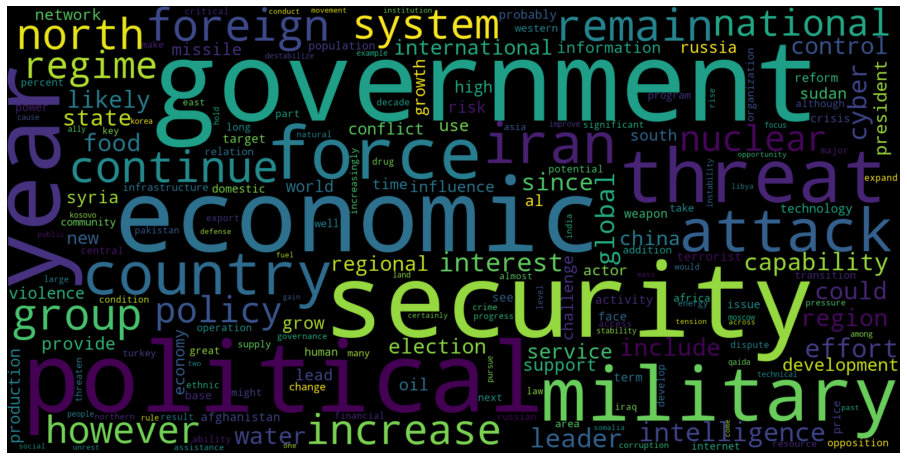

[(65, 'continue'), (60, 'government'), (56, 'threat'), (52, 'economic'), (51, 'security'), (48, 'country'), (47, 'increase'), (40, 'political'), (35, 'probably'), (35, 'iran'), (33, 'military'), (33, 'force'), (33, 'election'), (31, 'global'), (30, 'attack'), (29, 'conflict'), (28, 'year'), (28, 'remain'), (28, 'group'), (27, 'support')]
            quantidade
continue            65
government          60
threat              56
economic            52
security            51
---------
continue      0.008276
government    0.007639
threat        0.007130
economic      0.006621
security      0.006494
Name: quantidade, dtype: float64


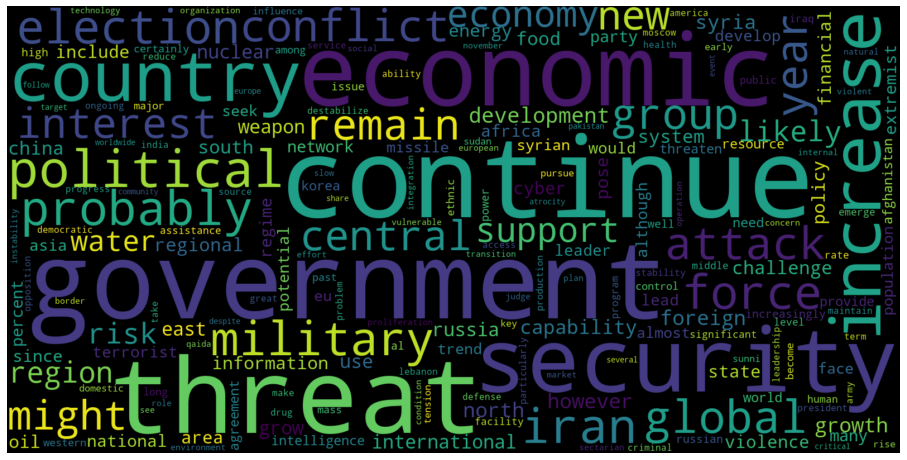

[(52, 'security'), (51, 'continue'), (50, 'probably'), (50, 'economic'), (44, 'threat'), (42, 'cyber'), (36, 'government'), (36, 'attack'), (34, 'force'), (34, 'country'), (33, 'increase'), (30, 'international'), (29, 'remain'), (27, 'global'), (26, 'political'), (25, 'missile'), (25, 'group'), (24, 'russia'), (24, 'north'), (24, 'include')]
          quantidade
security          52
continue          51
economic          50
probably          50
threat            44
---------
security    0.008416
continue    0.008254
economic    0.008092
probably    0.008092
threat      0.007121
Name: quantidade, dtype: float64


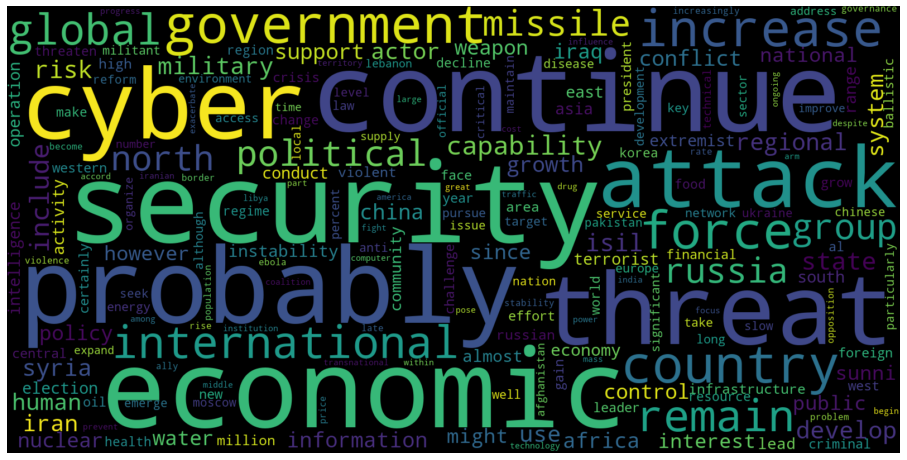

[(87, 'continue'), (59, 'threat'), (54, 'probably'), (50, 'increase'), (48, 'security'), (46, 'remain'), (43, 'government'), (42, 'use'), (42, 'country'), (39, 'attack'), (38, 'political'), (37, 'economic'), (36, 'isil'), (36, 'group'), (33, 'terrorist'), (31, 'might'), (30, 'russia'), (28, 'system'), (28, 'military'), (28, 'develop')]
          quantidade
continue          87
threat            59
probably          54
increase          50
security          48
---------
continue    0.011193
threat      0.007590
probably    0.006947
increase    0.006433
security    0.006175
Name: quantidade, dtype: float64


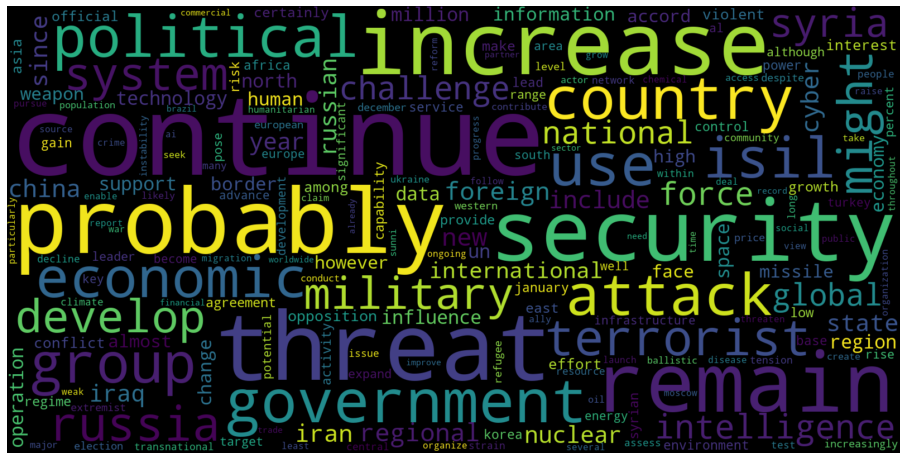

[(95, 'continue'), (71, 'threat'), (52, 'attack'), (44, 'likely'), (43, 'cyber'), (41, 'security'), (40, 'global'), (39, 'military'), (39, 'economic'), (38, 'russia'), (38, 'country'), (37, 'remain'), (34, 'weapon'), (34, 'capability'), (32, 'year'), (32, 'use'), (32, 'support'), (31, 'state'), (30, 'probably'), (30, 'include')]
          quantidade
continue          95
threat            71
attack            52
likely            44
cyber             43
---------
continue    0.012975
threat      0.009697
attack      0.007102
likely      0.006009
cyber       0.005873
Name: quantidade, dtype: float64


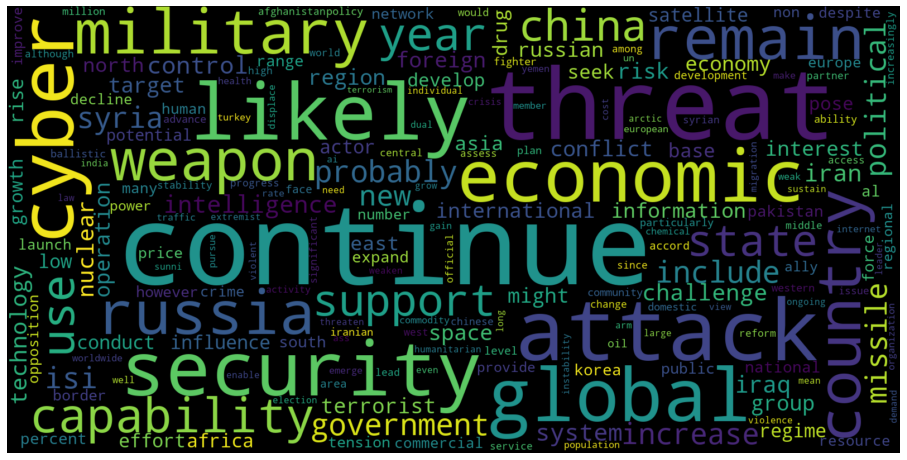

[(70, 'continue'), (55, 'attack'), (51, 'threat'), (39, 'use'), (37, 'russia'), (37, 'cyber'), (36, 'likely'), (35, 'probably'), (34, 'security'), (34, 'economic'), (34, 'country'), (31, 'year'), (31, 'iran'), (29, 'government'), (28, 'china'), (27, 'technology'), (27, 'political'), (27, 'include'), (26, 'weapon'), (26, 'increase')]
          quantidade
continue          70
attack            55
threat            51
use               39
cyber             37
---------
continue    0.012138
attack      0.009537
threat      0.008843
use         0.006763
cyber       0.006416
Name: quantidade, dtype: float64


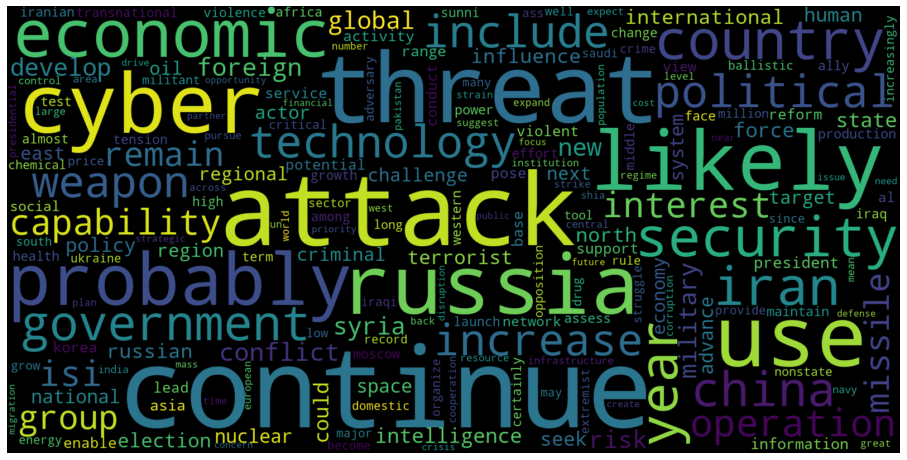

[(69, 'continue'), (59, 'military'), (57, 'china'), (56, 'economic'), (49, 'threat'), (48, 'russia'), (46, 'use'), (46, 'increase'), (46, 'attack'), (45, 'influence'), (44, 'security'), (43, 'cyber'), (41, 'year'), (38, 'remain'), (38, 'capability'), (37, 'iran'), (37, 'country'), (34, 'political'), (34, 'include'), (33, 'government')]
          quantidade
continue          69
military          59
china             57
economic          56
threat            49
---------
continue    0.008994
military    0.007690
china       0.007430
economic    0.007299
threat      0.006387
Name: quantidade, dtype: float64


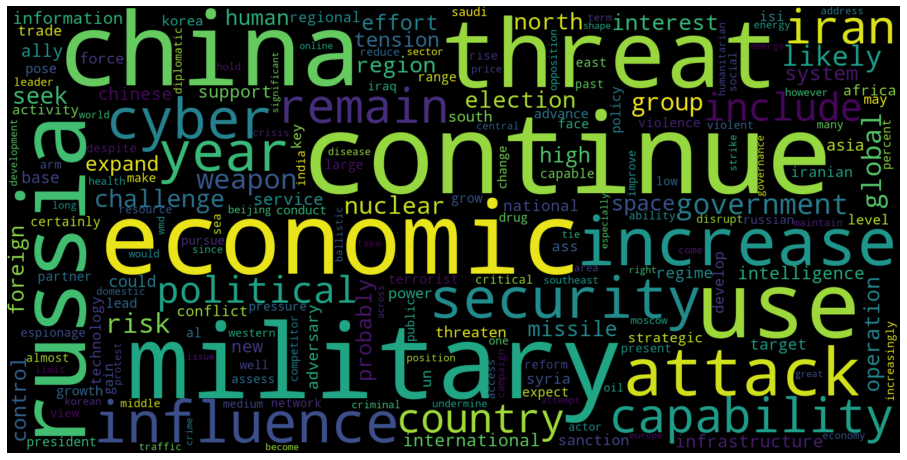

In [36]:
uni = u.analise_anos(df, 1, 1)